<a href="https://colab.research.google.com/github/zhangwiki86-soton/Python-Files-for-Practice/blob/main/keras_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# keras example - MNIST dataset

This lesson uses the [MNIST digits dataset](course_datasets.md#mnist-digits).  The keras documentation has a similar tutorial [here](https://keras.io/examples/vision/mnist_convnet/).

In [ ]:
#  Required installations
# !pip install tensorflow keras

In [1]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

# from tensorflow.keras import models, layers
# from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

from sklearn.metrics import confusion_matrix

In [2]:
num_classes = 10
input_shape = (28, 28, 1)

The MNIST dataset is an internal dataset to the keras package.  The labels (y) are values between 0 and 9. Load the data into training and test datasets.

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}, X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train.shape: (60000, 28, 28), y_train.shape: (60000,), X_test.shape: (10000, 28, 28), y_test.shape: (10000,)


We can look at the first (of 60,000) training images.  It is a 28 x 28 array of values between 0 (black) and 255 (white)

In [4]:
print(X_train[0])
#this is the first image of X

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

We can plot the image using matplotlib.

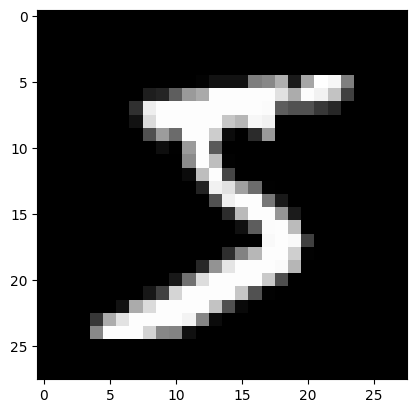

In [5]:
plt.imshow(X_train[0], cmap="gray")

Let's have a look at some more of these images. The next code cell finds the first image of each class (0 through 9) in the training data and plots it with the label above.

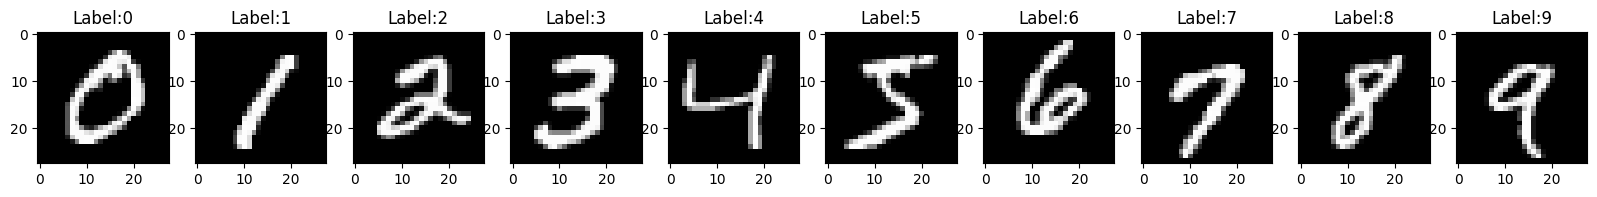

In [6]:
fig, ax = plt.subplots(1, num_classes, figsize=(20,20))

# Loop through 10 elements from train dataset
for i in range(num_classes): # 0 to 9
  sample = X_train[y_train == i][0] # Get first image from each class
  ax[i].imshow(sample, cmap="gray") # Show sample image
  ax[i].set_title(f"Label:{i}") # Set title as class label

We need to one-hot encode the y values so that each value (digit) becomes a vector of 10 values (9 values of zero and a single 1). For example 2 becomes [0,0,1,0,0,0,0,0,0,0].

One-hot encoding is a technique used in machine learning and data preprocessing to represent categorical data as binary vectors. It is particularly useful when dealing with categorical features or labels in a machine learning model.

In [7]:
for i in range(7):
    print(f"Before : {y_train[i]}")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

for i in range(7):
    print(f"After : {y_train[i]}")


Before : 5
Before : 0
Before : 4
Before : 1
Before : 9
Before : 2
Before : 1
After : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
After : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
After : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
After : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
After : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
After : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
After : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


We normalise the data to ensure values are between 0 and 1.  This ensure that with several variable with different ranges, one variable does not dominate the ML calculation.

In [8]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000, 10))

In [9]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train[0] # now has values between 0 and 1 rather than 0 and 255

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
X_train =np.expand_dims(X_train, -1)
X_test =np.expand_dims(X_test, -1)
print(f'X_train.shape:\n{X_train.shape}\nX_test.shape:\n{X_test.shape}')

X_train.shape:
(60000, 28, 28, 1)
X_test.shape:
(10000, 28, 28, 1)


Build the model using a Convolutional Neural Network (CNN).

**How it works:**
1. **Conv2D layers** scan the image with sliding filters to detect patterns (like curves, edges, shapes)
2. **MaxPooling2D** shrinks the image to keep only the most important information
3. **Flatten** converts the processed image into a single list of numbers
4. **Dropout** randomly turns off some neurons to prevent the model from memorizing the training data
5. **Dense (output)** makes the final prediction: which digit (0-9) is in the image

**In simple terms:** The model learns to recognize handwritten digits by extracting features from the image and passing them through layers that gradually learn what each digit looks like.

In [11]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

Fit the model against the training date.  This sets the weights between nodes at the bias for each node to mimise also function between the values and the training y values.  

BATCH_SIZE and epochs control how long the proicess takes - these value are fairly arbitary

In [ ]:
BATCH_SIZE = 512
epochs = 11
model.fit(x=X_train, y=y_train, batch_size = BATCH_SIZE, epochs = epochs )

Epoch 1/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 43s 354ms/step - accuracy: 0.6032 - loss: 1.2620
Epoch 2/11


In [ ]:
predicted = model.predict(X_test)
print(f'predicted.shape: {predicted.shape}\n first value:\n{predicted[0]}')

An example of how argmax works

In [ ]:
first_prediction = predicted[0]
print(f'first_prediction: {first_prediction}')
first_actual = np.argmax(first_prediction)
print(f'first_actual: {first_actual}')

In [ ]:
y_actual = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(predicted, axis=1)
print(f'y_actual shape: {y_actual.shape}, y_pred_classes shape: {y_pred_classes.shape}')

Plot the image, and label with the actual and predicted values of the ith test image.

In [ ]:
i = 5
plt.figure(figsize=(4, 4))
plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
plt.title(f"Actual: {y_actual[i]}, Predicted: {y_pred_classes[i]}")
plt.axis('off')

See how well the model does against the training and more importantly the test data

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

END OF TUTORIAL

This shows what the softmax algorithm does - chooses the biggest of the 10 probability values

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) # pick the highest probability with "np.argmax()", and turn it into an index uing "axis=1"

# print vector of probabilities
print(f"What Softmax predicted: {y_pred}")

# print predicted number
print(f"What Softmax actually means: {y_pred_classes}")

In [ ]:
y_test

In [ ]:
random_num = np.random.choice(len(X_test))
X_sample = X_test[random_num]

# save true label of this sample in a variable
y_actual = np.argmax(y_test, axis=1)
y_sample_actual = y_actual[random_num]

# save a predicted label of this sample in a variable
y_sample_pred_class = y_pred_classes[random_num]

In [ ]:
plt.title(f"random_num {random_num}  Predicted: {y_sample_pred_class}, True:{y_sample_actual}")
plt.imshow(X_sample.reshape(28, 28), cmap="gray");